# Les quatres chevelure

**Probleme:**
  quatre personne(alice,bob,charlie,dalia) sont placer en file  sur des podiums de taille différente.leur couleurs de cheveux sauront teint
  d'une couleur orange ou indigo aléatoirement.
  Chaque personne voix les chévelure devant-elle et
  ne peut dire qu'un mot orange ou indigo

  **Le défi:**
  Quelle stratégie doivent mettre en place les participants pour déterminer l'ensemble des couleurs avec la plus grande probabilité.



## Réponse

si un personne voit un nombre pair de cheveux indigo  il dit "orange" sinon il dit "indigo"

## **Installation des dépendances**

In [2]:
!pip install qiskit[visualization]
!pip install qiskit-aer
!pip install pylatexenc

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 6.3/6.3 MB 12.9 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.0/2.0 MB 28.3 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 49.6/49.6 kB 3.8 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 115.3/115.3 kB 11.5 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 49.6/49.6 kB 5.2 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 39.4/39.4 MB 13.7 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 162.6/162.6 kB 14.7 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 107.5/107.5 kB 10.0 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.6/1.6 MB 74.4 MB/s eta 0:00:00
  Created wheel for pylatexenc: filename=pylatexenc-2.10-py3-none-any.whl size=136816 sha256=deeb6a12eb4eab59b0a11b4a2e98bd8607ae6213a2996ffab57499ff9bf82f7d
  Stored in directory: /root/.cache/pip/wheels/d3/31/8b/e09b0386afd80cfc55

note: qubit=0 pair ou orange qubit=1 inpaire ou indigo
q0(alice),q1(bob),q2(charlie),q3(dalia),q4(raisonement d'alice),q5(raisonement de bob),q6(raisonement de charlie),q7(raisonement dalia)
c8 pour la mesure

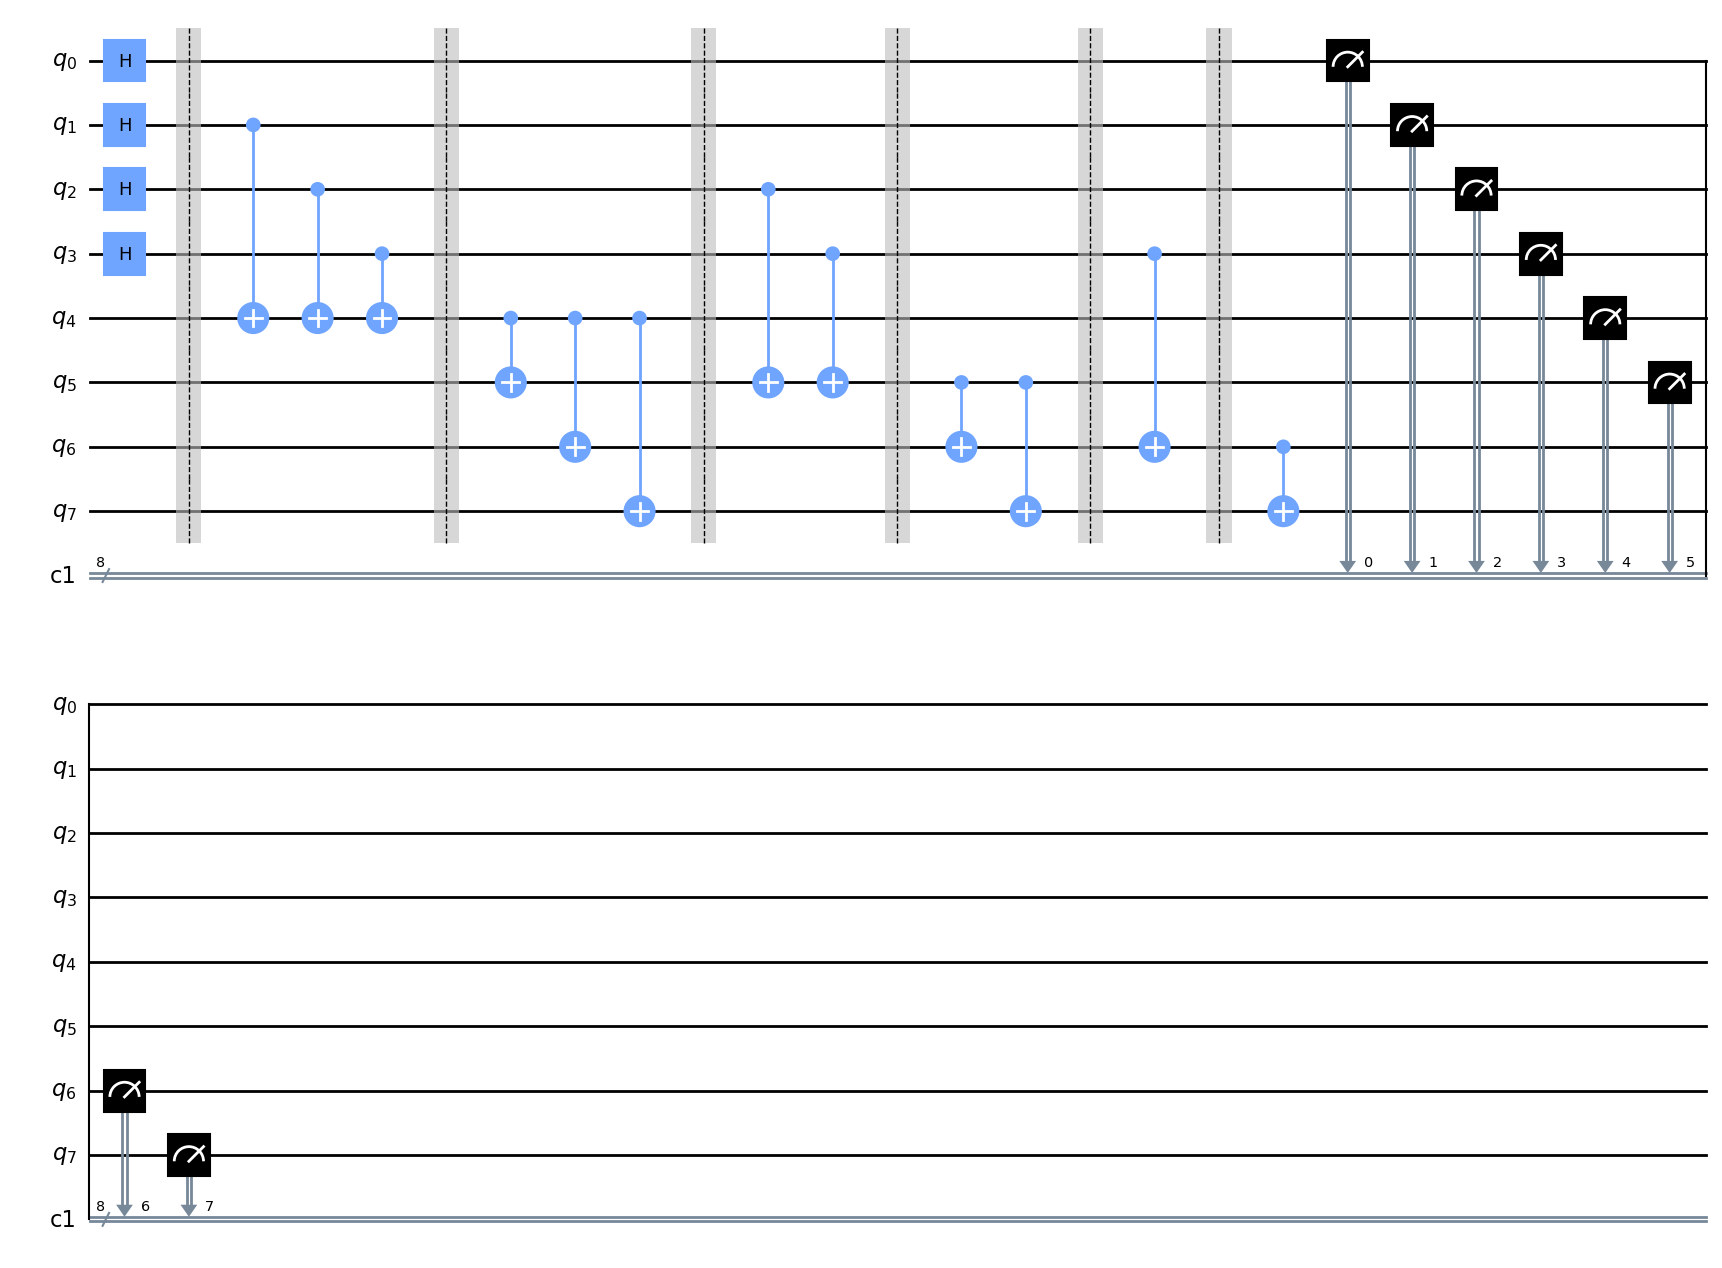

In [6]:
import numpy as np
from qiskit import *
#initialisation du circuit
quantumCirc=QuantumCircuit(8)
classicalRegister=ClassicalRegister(8)
quantumCirc.add_register(classicalRegister)
#mise en superposition des  qubit des joueurs,toute les possibilités peuvent être déterminer
quantumCirc.h(0)
quantumCirc.h(1)
quantumCirc.h(2)
quantumCirc.h(3)
quantumCirc.barrier()
#calcule des nombre impair/pair grace au port cnot(cx) de cheveux indigo pour alice
quantumCirc.cx(1,4)
quantumCirc.cx(2,4)
quantumCirc.cx(3,4)
quantumCirc.barrier()
#les autre joueur prenne note la réponse d'alice
quantumCirc.cx(4,5)
quantumCirc.cx(4,6)
quantumCirc.cx(4,7)
quantumCirc.barrier()
#calcule des nombre impair/pair grace au port cnot(cx) de cheveux indigo pour bob
quantumCirc.cx(2,5)
quantumCirc.cx(3,5)
quantumCirc.barrier()
#les autre joueur prenne note la réponse de bob
quantumCirc.cx(5,6)
quantumCirc.cx(5,7)
quantumCirc.barrier()
#calcule des nombre impair/pair grace au port cnot(cx) de cheveux indigo pour charlie
quantumCirc.cx(3,6)
quantumCirc.barrier()
#dalia annonce sa couleur
quantumCirc.cx(6,7)
quantumCirc.measure(range(8), range(8))
quantumCirc.draw("mpl")


In [4]:
# supported by the backend
from qiskit import transpile

# Use AerSimulator
from qiskit_aer import AerSimulator

simulator = Aer.get_backend('statevector_simulator')
compiled_circuit = transpile(quantumCirc, simulator)
job = simulator.run(compiled_circuit, shots=1024)
result_sim = job.result()


{'10011000': 72, '11111111': 56, '01010100': 59, '00110011': 61, '11001101': 80, '01100110': 77, '10101011': 66, '10101010': 62, '00000001': 64, '00110010': 61, '01100111': 60, '00000000': 61, '11001100': 59, '01010101': 50, '10011001': 69, '11111110': 67}


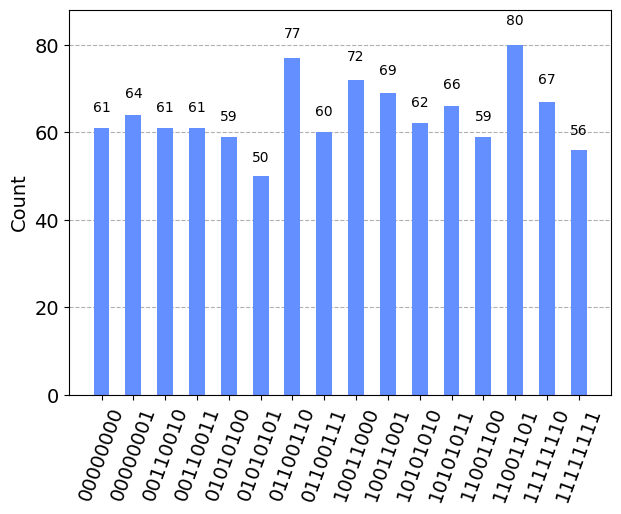

In [5]:
#vecteur d'etat
counts = result_sim.get_counts(compiled_circuit)
print(counts)

from qiskit.visualization import plot_histogram

plot_histogram(counts)

Il y a 16 possibilité et l'événement qui s'est produit le plus souvent est (11001101) de la droite vers la gauche d'Alia, Bob ont une teinture orange, Charlie et d'Alia ont une teinture indigo
q0: 1
q1 :0
q2: 1
q3: 1
q4: 0
q5: 0
q6: 1
q7: 1
vue que les qubit de 1 a 3 sont les mêmes que les qubit 5 a 7 c'est une situation ou ils ont trouvé l'ensemble des couleurs
